In [0]:
%matplotlib inline
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/train/
   creating: data/train/0/
  inflating: data/train/0/barcode610.jpg  
  inflating: data/train/0/barcode613.jpg  
  inflating: data/train/0/barcode616.jpg  
  inflating: data/train/0/barcode617.jpg  
  inflating: data/train/0/barcode64.jpg  
  inflating: data/train/0/barcode65.jpg  
  inflating: data/train/0/barcode66.jpg  
  inflating: data/train/0/barcode67.jpg  
  inflating: data/train/0/barcode68.jpg  
  inflating: data/train/0/barcode69.jpg  
  inflating: data/train/0/barcode74.jpg  
  inflating: data/train/0/barcode75.jpg  
  inflating: data/train/0/barcode76.jpg  
  inflating: data/train/0/barcode77.jpg  
  inflating: data/train/0/barcode78.jpg  
  inflating: data/train/0/barcode79.jpg  
  inflating: data/train/0/img1       
  inflating: data/train/0/barcode_nue87.jpg  
  inflating: data/train/0/barcode_nue89.jpg  
  inflating: data/train/0/barcode_nue90.jpg  
  inflating: data/train/0/barcode_nue93.jpg  
  inflating:

In [0]:
import os,fnmatch
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from keras.callbacks import ModelCheckpoint
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras import optimizers
from keras import backend as K
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils import np_utils

np.random.seed(2) 

sns.set(style='white', context='notebook', palette='deep')

In [0]:
from imutils import paths

relevant_path = "data/train/"
imagePaths = list(paths.list_images(relevant_path))
for imagePath in imagePaths:
   label = imagePath.split(os.path.sep)[-2]
   print(imagePath)
   print(label)

data/train/1/barcode_nue262.jpg
1
data/train/1/barcode_nue68.jpg
1
data/train/1/barcode_nue255.jpg
1
data/train/1/barcode_nue67.jpg
1
data/train/1/barcode_nue254.jpg
1
data/train/1/barcode_nue1.jpg
1
data/train/1/barcode_nue259.jpg
1
data/train/1/barcode635.jpg
1
data/train/1/barcode636.jpg
1
data/train/1/barcode84.jpg
1
data/train/1/barcode727.jpg
1
data/train/1/barcode611.jpg
1
data/train/1/barcode627.jpg
1
data/train/1/barcode643.jpg
1
data/train/1/barcode_nue250.jpg
1
data/train/1/barcode_nue62.jpg
1
data/train/1/barcode_nue258.jpg
1
data/train/1/barcode_nue57.jpg
1
data/train/1/barcode711.jpg
1
data/train/1/barcode_nue252.jpg
1
data/train/1/barcode83.jpg
1
data/train/1/barcode_nue245.jpg
1
data/train/1/barcode_nue241.jpg
1
data/train/1/barcode675.jpg
1
data/train/1/barcode_nue257.jpg
1
data/train/1/barcode_nue21.jpg
1
data/train/1/barcode_nue238.jpg
1
data/train/1/barcode_nue260.jpg
1
data/train/1/barcode683.jpg
1
data/train/1/barcode_nue64.jpg
1
data/train/1/barcode721.jpg
1
data

In [0]:
import random
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Leer archivos para preprocesar 
relevant_path = "data/train/"
pattern = "*.jpg"  
img_width=224
img_height=224

nb_classes = 2

img_channels = 1

print('Formato imagenes: ', K.image_data_format())
# Formato imagenes:  channels_last
 
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(relevant_path)))
random.seed(42)
random.shuffle(imagePaths)

# load the image, pre-process it, and store it in the data list
for imagePath in imagePaths:
    #fpaths.append(relevant_path + w)
    #if w not in images:
    #    if fnmatch.fnmatch(imagePath, pattern):
    image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE) 
    image = cv2.resize(image, (img_width, img_height), img_channels)
    image = img_to_array(image)
    data.append(image)
        
    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    label = 1 if (label.endswith("1")) else 0
    labels.append(label)
    
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)        
        
print('Cantidad imagenes: ', len(data))  
print('x_train shape:', data.shape)
print(data.shape[0], 'train samples')

Formato imagenes:  channels_last
[INFO] loading images...
Cantidad imagenes:  99
x_train shape: (99, 224, 224, 1)
99 train samples


In [0]:
from keras import utils
from sklearn.model_selection import train_test_split

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(x_train, x_test, y_train, y_test) = train_test_split(data, labels, test_size=0.25, random_state=42)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = utils.to_categorical(y_train, num_classes)
y_test= utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print('x_train shape:', x_train.shape)
print(x_test.shape[0], 'test samples')
print('x_test shape:', x_test.shape)

74 train samples
x_train shape: (74, 224, 224, 1)
25 test samples
x_test shape: (25, 224, 224, 1)


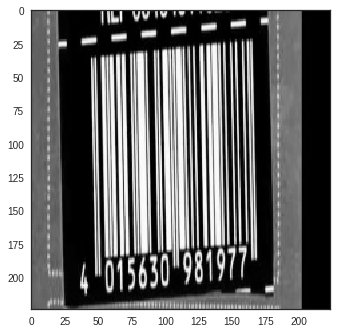

In [0]:
g = plt.imshow(x_train[1][:,:,0])

In [0]:
## DEFINE MODEL CNN 

In [0]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import GlobalAveragePooling2D, BatchNormalization
from keras.layers.core import Activation, Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

class ModelImage:
    @staticmethod
    def build_cnn1(width, height, depth, classes):
        # initialize the model
        model_cnn1 = Sequential()
        inputShape = (height, width, depth)

        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (height, width, depth)
            
        model_cnn1 = Sequential()
        model_cnn1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=inputShape))
        model_cnn1.add(Activation('relu'))
        model_cnn1.add(Dropout(0.25))

        model_cnn1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
        model_cnn1.add(Activation('relu'))
            
        model_cnn1.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
        model_cnn1.add(Activation('relu'))
        model_cnn1.add(Dropout(0.25))
        
        #model_cnn1.add(Flatten(input_shape=inputShape))
        model_cnn1.add(GlobalAveragePooling2D())
        model_cnn1.add(Dense(5, activation='relu'))
        model_cnn1.add(Dropout(0.5))
        model_cnn1.add(Dense(classes, activation='sigmoid'))

        return model_cnn1
    
    def build_cnn2(width, height, depth, classes):
        # initialize the model 
        model_cnn2 = Sequential()
        inputShape = (height, width, depth)

        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)

        model_cnn2.add(Flatten(input_shape=inputShape))
        model_cnn2.add(Dense(256, activation='relu'))
        model_cnn2.add(Dropout(0.5))
        model_cnn2.add(Dense(classes, activation='sigmoid'))
    
        return model_cnn2    

In [0]:
## CASO 1 SIN AUMENTACION 
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
print("[INFO] compiling model...")
model_cnn1 = ModelImage.build_cnn2(width=img_width, height=img_height, depth=img_channels, classes=num_classes) 
model_cnn1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

print(model_cnn1.summary())

Instructions for updating:
Colocations handled automatically by placer.
[INFO] compiling model...
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               12845312  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 12,845,826
Trainable params: 12,845,826
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.0001)

In [0]:
epochs = 30
batch_size = 36

In [0]:
# Without data augmentation 
checkpointer1 = ModelCheckpoint(filepath='model_cnn1_sin_aug.hdf5', verbose=1, save_best_only=True)
#plot_losses1 = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_test, y_val_categorical=y_test)

model_cnn1.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test), verbose = 1, callbacks=[learning_rate_reduction,checkpointer1]) 

Train on 74 samples, validate on 25 samples
Epoch 1/30
74/74 [==============================] - 1s 9ms/step - loss: 0.6308 - acc: 0.6486 - val_loss: 0.6305 - val_acc: 0.8800

Epoch 00001: val_loss improved from inf to 0.63049, saving model to model_cnn1_sin_aug.hdf5
Epoch 2/30
74/74 [==============================] - 0s 7ms/step - loss: 0.6254 - acc: 0.6689 - val_loss: 0.6602 - val_acc: 0.4800

Epoch 00002: val_loss did not improve from 0.63049
Epoch 3/30
74/74 [==============================] - 1s 8ms/step - loss: 0.6653 - acc: 0.5405 - val_loss: 0.6347 - val_acc: 0.7200

Epoch 00003: val_loss did not improve from 0.63049
Epoch 4/30
74/74 [==============================] - 1s 8ms/step - loss: 0.6348 - acc: 0.6689 - val_loss: 0.6261 - val_acc: 0.8200

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00004: val_loss improved from 0.63049 to 0.62615, saving model to model_cnn1_sin_aug.hdf5
Epoch 5/30
74/74 [==============================] - 1s 8ms/st

In [0]:
## CASO 2 
# With data augmentation to prevent overfitting 
datagen = ImageDataGenerator(rescale = 1./255)

datagen = ImageDataGenerator(
             featurewise_center=False, # set input mean to 0 over the dataset
             samplewise_center=False, # set each sample mean to 0
             featurewise_std_normalization=False, # divide inputs by std of the dataset
             samplewise_std_normalization=False, # divide each input by its std
             zca_whitening=False, # apply ZCA whitening
             rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
             zoom_range = 0.1, # Randomly zoom image
             width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
             height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
             horizontal_flip=False, # randomly flip images
             vertical_flip=False) # randomly flip images

datagen.fit(x_train)

In [0]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
print("[INFO] compiling model...")

model_cnn2 = ModelImage.build_cnn2(width=img_width, height=img_height, depth=img_channels, classes=num_classes) 
model_cnn2.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

print(model_cnn2.summary())

[INFO] compiling model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               12845312  
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 514       
Total params: 12,845,826
Trainable params: 12,845,826
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
checkpointer2 = ModelCheckpoint(filepath='model_cnn1_con_aug.hdf5', verbose=1, save_best_only=True)
#plot_losses2 =  PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_test, y_val_categorical=y_test)
# Fit the model                       
model_cnn2.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (x_test,y_test), verbose = 2, steps_per_epoch=x_train.shape[0], callbacks=[learning_rate_reduction,checkpointer2]) 

Epoch 1/30
 - 18s - loss: 0.7177 - acc: 0.4907 - val_loss: 0.6796 - val_acc: 0.5200

Epoch 00001: val_loss improved from inf to 0.67959, saving model to model_cnn1_con_aug.hdf5
Epoch 2/30
 - 17s - loss: 0.6735 - acc: 0.5749 - val_loss: 0.6742 - val_acc: 0.6000

Epoch 00002: val_loss improved from 0.67959 to 0.67416, saving model to model_cnn1_con_aug.hdf5
Epoch 3/30
 - 17s - loss: 0.6855 - acc: 0.5429 - val_loss: 0.6733 - val_acc: 0.6600

Epoch 00003: val_loss improved from 0.67416 to 0.67331, saving model to model_cnn1_con_aug.hdf5
Epoch 4/30
 - 17s - loss: 0.6840 - acc: 0.5576 - val_loss: 0.6676 - val_acc: 0.6400

Epoch 00004: val_loss improved from 0.67331 to 0.66759, saving model to model_cnn1_con_aug.hdf5
Epoch 5/30
 - 17s - loss: 0.6598 - acc: 0.6014 - val_loss: 0.6798 - val_acc: 0.5200

Epoch 00005: val_loss did not improve from 0.66759
Epoch 6/30
 - 17s - loss: 0.6667 - acc: 0.5997 - val_loss: 0.6501 - val_acc: 0.8800

Epoch 00006: val_loss improved from 0.66759 to 0.65008, sav

MODELO 1 sin aumentacion


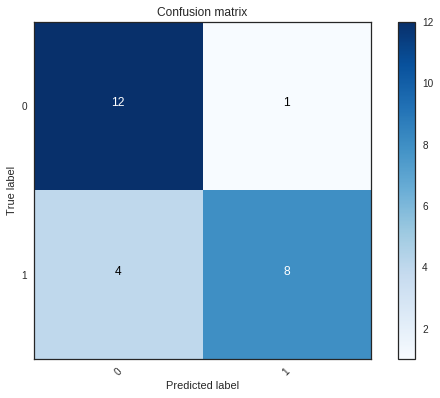

In [0]:
# Look at confusion matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues, modelo=None):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
print("MODELO 1 sin aumentacion")  
modelo=model_cnn1   
# Predict the values from the validation dataset
Y_pred = modelo.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)

# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2), modelo=model_cnn1)


MODELO 2 con aumentacion 


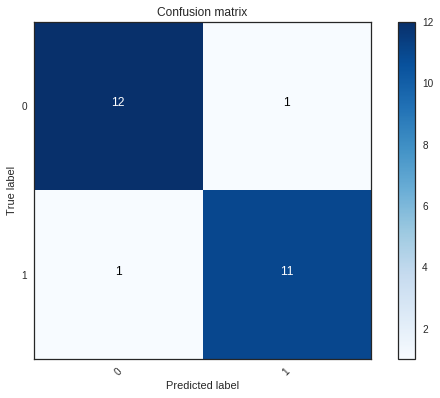

In [0]:
print("MODELO 2 con aumentacion ") 
modelo=model_cnn2 
# Predict the values from the validation dataset
Y_pred = modelo.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)

# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plot_confusion_matrix(confusion_mtx, classes = range(2), modelo=model_cnn2)

In [0]:
# Modelo 1 sin aumentacion 
# Cargo los valores del modelo
model_cnn2.load_weights('model_cnn1_sin_aug.hdf5')
score1 = model_cnn2.evaluate(x_test, y_test, verbose=0)
print("loss: ", score1[0])
print("accuracy: ", score1[1])

loss:  0.612320601940155
accuracy:  0.7599999904632568


In [0]:
# Modelo 1 con aumentacion 
model_cnn2.load_weights('model_cnn1_con_aug.hdf5')
score2 = model_cnn2.evaluate(x_test, y_test, verbose=0)
print("loss: ", score2[0])
print("accuracy: ", score2[1])

loss:  0.5011717677116394
accuracy:  0.9200000166893005
